In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
import numpy as np
X_train=np.array([[[1,2,3,4],[2,3,4,5],[5,6,7,8],[1,3,4,5]],[[-1,2,3,-4],[2,-3,4,5],[-5,6,-7,8],[-1,-3,-4,-5]]])
y_train=np.array([0,1])

In [0]:
X_train = X_train / 8
#y_train = to_categorical(y_train)

In [0]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[1],1 ).astype('float32')

In [0]:
model = Sequential()
model.add(Conv2D(1, (3,3), input_shape=(4,4,1),activation='relu', name='Convolution_layer'))
model.add(MaxPooling2D(pool_size=(2, 2), name='Pooling_layer'))
model.add(Flatten(name='Flatten_layer'))
model.add(Dense(1, activation='sigmoid', name = 'Output_layer'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolution_layer (Conv2D)   (None, 2, 2, 1)           10        
_________________________________________________________________
Pooling_layer (MaxPooling2D) (None, 1, 1, 1)           0         
_________________________________________________________________
Flatten_layer (Flatten)      (None, 1)                 0         
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 2         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(X_train, y_train, epochs = 1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
2/2 [==============================] - 1s 371ms/step - loss: 0.8263 - acc: 0.5000
Epoch 2/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8248 - acc: 0.5000
Epoch 3/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8231 - acc: 0.5000
Epoch 4/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8213 - acc: 0.5000
Epoch 5/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8194 - acc: 0.5000
Epoch 6/1000
2/2 [==============================] - 0s 863us/step - loss: 0.8176 - acc: 0.5000
Epoch 7/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8157 - acc: 0.5000
Epoch 8/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8137 - acc: 0.5000
Epoch 9/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.8118 - acc: 0.5000
Epoch 10/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.8098 - acc: 0.5000
Epoch 11/1000
2/2

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


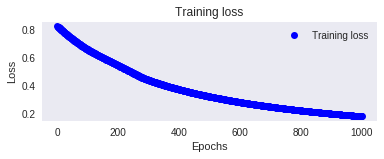

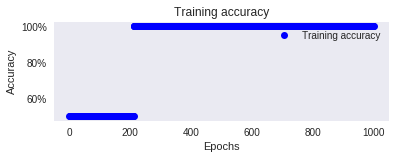

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['acc']
epochs = range(1, len(loss_values) + 1)

import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [0]:
model.weights

[<tf.Variable 'Convolution_layer/kernel:0' shape=(3, 3, 1, 1) dtype=float32_ref>,
 <tf.Variable 'Convolution_layer/bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'Output_layer/kernel:0' shape=(1, 1) dtype=float32_ref>,
 <tf.Variable 'Output_layer/bias:0' shape=(1,) dtype=float32_ref>]

In [0]:
model.get_weights()[0].shape

(3, 3, 1, 1)

In [0]:
model.predict(X_train[0].reshape(1,4,4,1))

array([[0.04289691]], dtype=float32)

In [0]:
model.get_weights()

[array([[[[ 0.59612453]],
 
         [[-0.00498459]],
 
         [[ 0.14057319]]],
 
 
        [[[ 1.0307273 ]],
 
         [[ 0.39224213]],
 
         [[ 0.635611  ]]],
 
 
        [[[ 0.00861139]],
 
         [[ 0.5230126 ]],
 
         [[ 0.5116593 ]]]], dtype=float32),
 array([-0.3450459], dtype=float32),
 array([[-1.7649331]], dtype=float32),
 array([0.9546897], dtype=float32)]

In [0]:
X_train[0].shape[0]-model.get_weights()[0].shape[0]

1

In [0]:
sumprod = []
for i in range(X_train[0].shape[0]-model.get_weights()[0].shape[0]+1):
  for j in range(X_train[0].shape[0]-model.get_weights()[0].shape[0]+1):
    img_subset = np.array(X_train[0,i:(i+3),j:(j+3),0])
    model_filter = model.get_weights()[0].reshape(3,3)
    val = np.sum(img_subset*model_filter) + model.get_weights()[1]
    sumprod.append(val)
  

In [0]:
sumprod= np.array(sumprod).reshape(2,2,1)

In [0]:
sumprod = np.where(sumprod>0,sumprod,0)

In [0]:
pooling_layer_output = np.max(sumprod)

In [0]:
intermediate_output_value = pooling_layer_output*model.get_weights()[2]+model.get_weights()[3]

In [0]:
1/(1+np.exp(-intermediate_output_value))

array([[0.04289691]], dtype=float32)